# <font color='steelblue'> B. Does silencing the cingulate cortex during a test run leads to performance impairments? (timeouts removed)
    
### I will repeat the performance analysis, now with after the removal of trials in which the rat did not express his choice before 15 seconds have elapsed from the start of the trial. During test illumination, the silencing of CG ends after 15 seconds after the illumination started. Therefore, we will only keep in our analysis the trials in which the rat expressed his choice during the first 15 seconds of the run, discarding the ones in which he did not (timeout trials).
    
### Furthermore, I will remove trials in which the sample run was not fully illuminated - in which the rat did not reach the reward port before 15 seconds have elapsed.   
    
### To determine whether the rat has expressed his choice before the 15 seconds has elapsed, we will calculate the latency until exiting the choice point ROI. 

### <font color='firebrick'> Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from file_lists import get_file_list
%matplotlib inline
%run data_prep_functions.ipynb

### <font color='firebrick'> Input

In [2]:
path = "E:\POSITION DATA\PRE PROCESSED"

### <font color= 'seagreen'> Collect the pruned timestamped position and CP rois from all rats in the given path

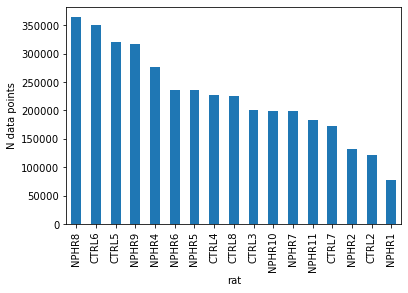

array([-1.,  0.,  1.,  3.])

In [3]:
data, cp_rois = collect_pruned_position_and_cp_rois_all_rats_in_path(path)
# Check if data from all rats are present in the dataframe
data['rat'].value_counts().plot.bar()
plt.xlabel('rat')
plt.ylabel('N data points')
plt.show()

data['stim_condition'].unique()

### <font color='seagreen'> Collect only the data from test runs

In [4]:
test_runs_raw=data[data['run_type'] == 'T']
test_runs_raw['stim_condition'] =  test_runs_raw['stim_condition'].astype(int)
print(len(test_runs_raw.groupby(['rat','session','run_nr']).head(1)))
test_runs_raw=test_runs_raw[(test_runs_raw['stim_condition'] == 0) | (test_runs_raw['stim_condition'] == 3)]
test_runs_raw.head()

<ipython-input-4-adcb72988dad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_runs_raw['stim_condition'] =  test_runs_raw['stim_condition'].astype(int)


8000


,session,run_nr,timestamp,x,y,x_diff,run_type,stim_condition,outcome,rat,group
49845,2020-07-31T13_59_15,2.0,109.125734,38.21450,70.39420,-164.707738,T,0,0.0,NPHR5,NPHR
49846,2020-07-31T13_59_15,2.0,109.159270,39.48572,70.52858,1.271220,T,0,0.0,NPHR5,NPHR
49847,2020-07-31T13_59_15,2.0,109.192307,40.18096,70.41904,0.695240,T,0,0.0,NPHR5,NPHR
49848,2020-07-31T13_59_15,2.0,109.225306,40.10000,70.60000,-0.080960,T,0,0.0,NPHR5,NPHR
49849,2020-07-31T13_59_15,2.0,109.257997,40.13704,70.97778,0.037040,T,0,0.0,NPHR5,NPHR


### <font color='seagreen'> Get ROI crossing timestamps: start of run, entry in cp, exit of cp and calculate the latency to CP exit

In [5]:
test_runs = get_roi_crossing_timestamps_for_runs_in_df(test_runs_raw, cp_rois)
test_runs['latency_to_cp_exit'] = test_runs['cp_exit_timestamp'] - test_runs['start_timestamp']
test_runs.head(3)

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_exit
0,2019-08-08T12_41_07,NPHR1,10.0,751.518003,T,3,1.0,NPHR,755.435469,756.431386,4.913382
1,2019-08-08T12_41_07,NPHR1,14.0,954.084992,T,3,0.0,NPHR,957.866982,958.900954,4.815962
2,2019-08-08T12_41_07,NPHR1,16.0,1018.530202,T,0,1.0,NPHR,1045.142451,1046.004096,27.473894


In [6]:
trial_count = test_runs.groupby(['group', 'rat', 'stim_condition'])['run_nr'].count()
trial_count

group  rat     stim_condition
CTRL   CTRL2   0                 125
               3                 130
       CTRL3   0                 144
               3                 138
       CTRL4   0                 150
               3                 148
       CTRL5   0                 150
               3                 149
       CTRL6   0                 144
               3                 147
       CTRL7   0                 150
               3                 148
       CTRL8   0                 149
               3                 149
NPHR   NPHR1   0                  55
               3                  56
       NPHR10  0                 147
               3                 147
       NPHR11  0                 151
               3                 147
       NPHR2   0                  40
               3                  39
       NPHR4   0                 142
               3                 141
       NPHR5   0                 149
               3                 144
       N

### <font color='seagreen'> Remove runs without an expressed choice before 15 secs from the start have elapsed 

In [7]:
below15_test_runs = test_runs[test_runs['latency_to_cp_exit']<15]
above15_test_runs = test_runs[test_runs['latency_to_cp_exit']>=15]
below15_test_runs.head(3)

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_exit
0,2019-08-08T12_41_07,NPHR1,10.0,751.518003,T,3,1.0,NPHR,755.435469,756.431386,4.913382
1,2019-08-08T12_41_07,NPHR1,14.0,954.084992,T,3,0.0,NPHR,957.866982,958.900954,4.815962
3,2019-08-08T12_41_07,NPHR1,18.0,1151.446016,T,0,1.0,NPHR,1153.832614,1154.563149,3.117133


In [8]:
trial_count = below15_test_runs.groupby(['group', 'rat', 'stim_condition'])['run_nr'].count()
trial_count

group  rat     stim_condition
CTRL   CTRL2   0                 119
               3                 124
       CTRL3   0                 143
               3                 132
       CTRL4   0                 141
               3                 143
       CTRL5   0                 141
               3                 133
       CTRL6   0                 117
               3                 118
       CTRL7   0                 147
               3                 147
       CTRL8   0                 146
               3                 140
NPHR   NPHR1   0                  48
               3                  52
       NPHR10  0                 147
               3                 145
       NPHR11  0                 150
               3                 145
       NPHR2   0                  32
               3                  30
       NPHR4   0                 125
               3                 120
       NPHR5   0                 144
               3                 140
       N

In [9]:
print('Proportion of kept runs (below 15sec until CP exit):{}'.format(len(below15_test_runs)/len(test_runs)))
below_runs_count = below15_test_runs.groupby(['group', 'rat', 'stim_condition'])['run_nr'].count()
all_runs_count = test_runs.groupby(['group', 'rat','stim_condition'])['run_nr'].count().rename({'run_nr':'all'})

Proportion of kept runs (below 15sec until CP exit):0.9367562802996915


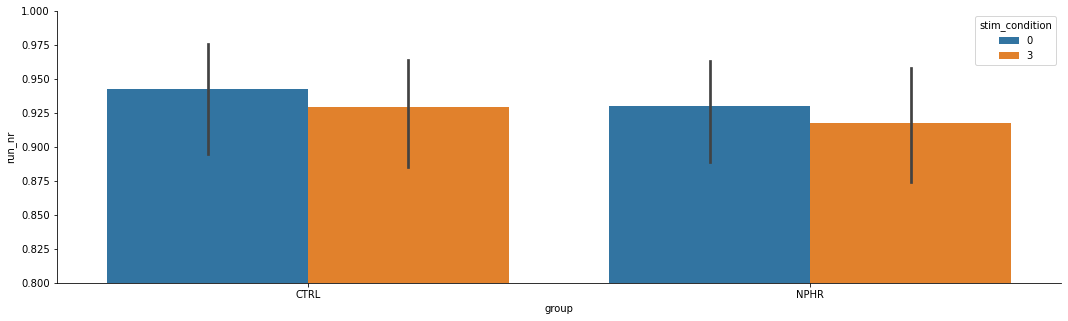

In [10]:
prop_kept_runs = below_runs_count/all_runs_count
plt.figure(figsize=(18,5))
sns.barplot(data=prop_kept_runs.reset_index(), x='group', hue='stim_condition', y='run_nr')
plt.ylim([.8,1])
sns.despine()

In [13]:
# Calculate performances for each rat, session and stimulation condition
session_perfs = below15_test_runs.groupby(['group','rat','session', 'stim_condition']).apply(calc_performance_in_group)
session_perfs = session_perfs.reset_index().rename(columns={0:'performance'})

# <font color='darkgreen'> 1. Does silencing the CG during the test runs leads to performance impairments across the protocol?
***
   #### Calculation of the overall performance for each rat given the stimulation condition and the experimental group
   #### Compares the performance levels of each experimental group under each stimulation condition, across the protocol
   #### If CG is necessary for memory-dependent choices in the DNMP task, we predict that:
   #### (1) NpHR+ group subjects will decrease their performance upon illumination of the CG when compared with a no illumination condition;
   #### (2) NpHR- group subject should not decrease their performance upon illumination of the CG.
***

In [14]:
pooled_perfs = session_perfs.groupby(['group', 'rat', 'stim_condition'])['performance'].mean().reset_index()

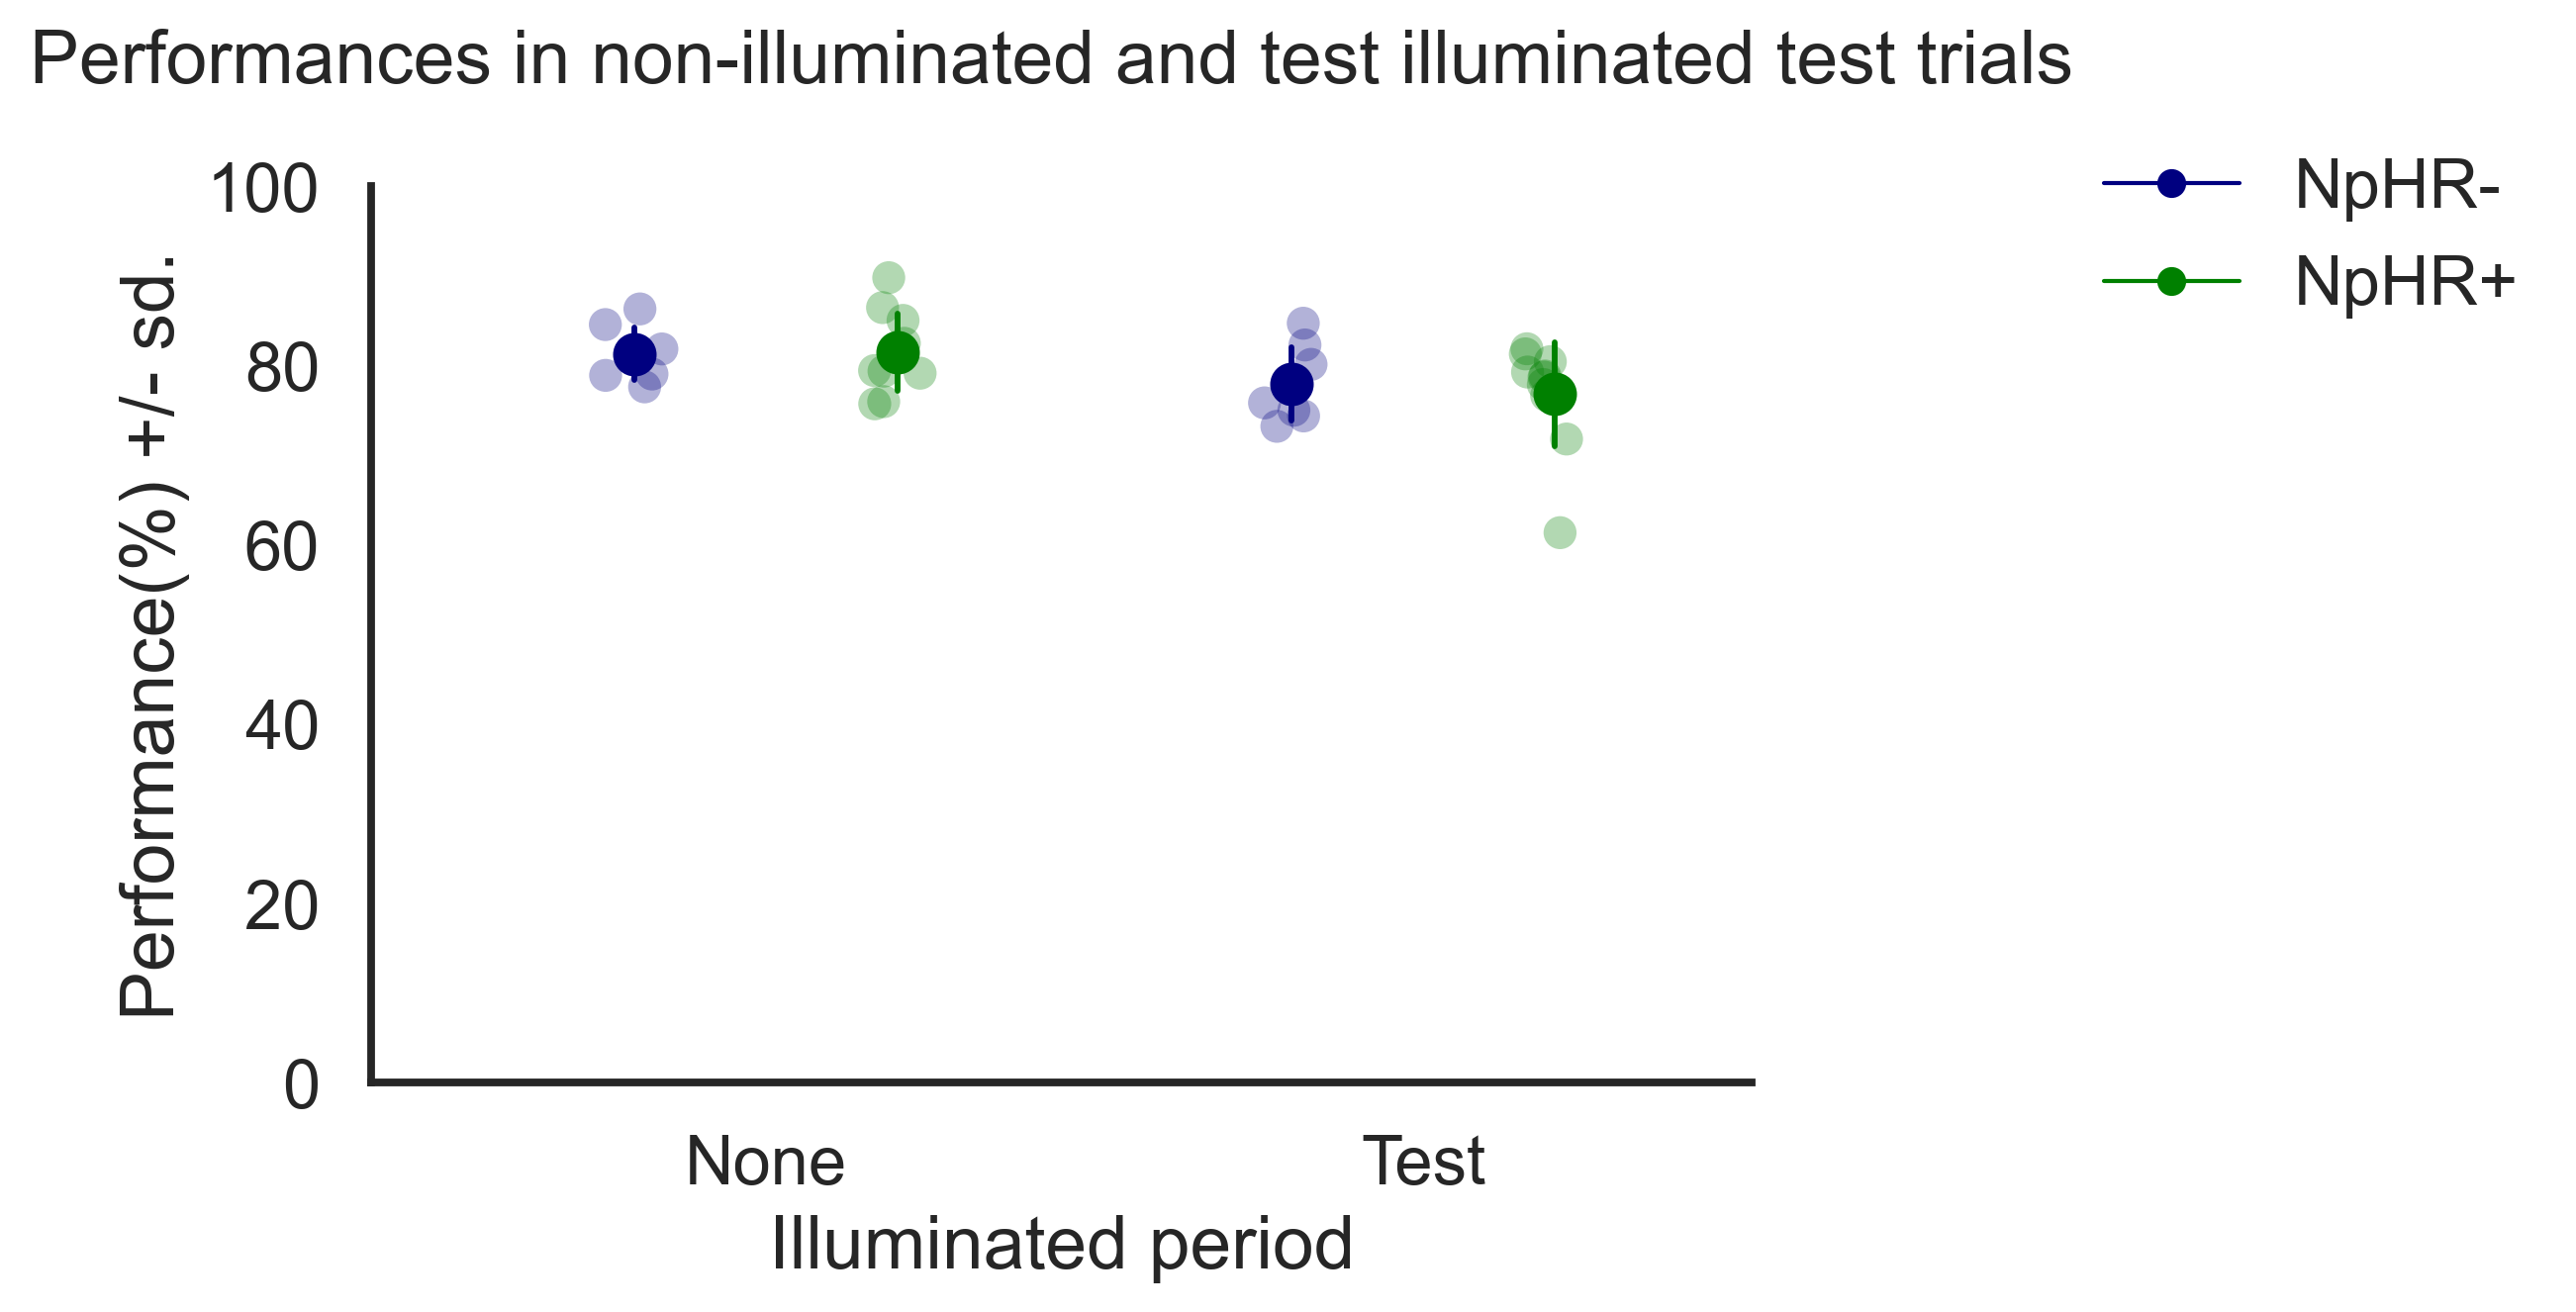

In [15]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(6,4),dpi=300)

pooled_perfs['stim_condition'] = pooled_perfs['stim_condition'].astype(str)

g = sns.stripplot(
    x='stim_condition', y='performance', hue='group',
    data=pooled_perfs,
    dodge=2, jitter=.09,
    alpha=.3, s=8,
    palette=['navy', 'green'],
    order=['0', '3']
)

# Show means
sns.pointplot(
    x='stim_condition', y='performance', hue='group',
    data=pooled_perfs,
    dodge=.4, 
    join=False,            
    markers="o", scale=.8,
    ci="sd", errwidth=1.4,
    palette=['navy', 'green'],
    order=['0', '3']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(0, 100), xlim=(-0.6, 1.5),
    title='Performances in non-illuminated and test illuminated test trials \n'
)

g.set_xticklabels(labels=['None', 'Test'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()

control_line = mlines.Line2D([], [], color='navy', marker='o', markersize=6, linewidth=1, label='NpHR-')
nphr_line = mlines.Line2D([], [], color='green', marker='o', markersize=6, linewidth=1, label='NpHR+')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.6, 1.1))
sns.despine()

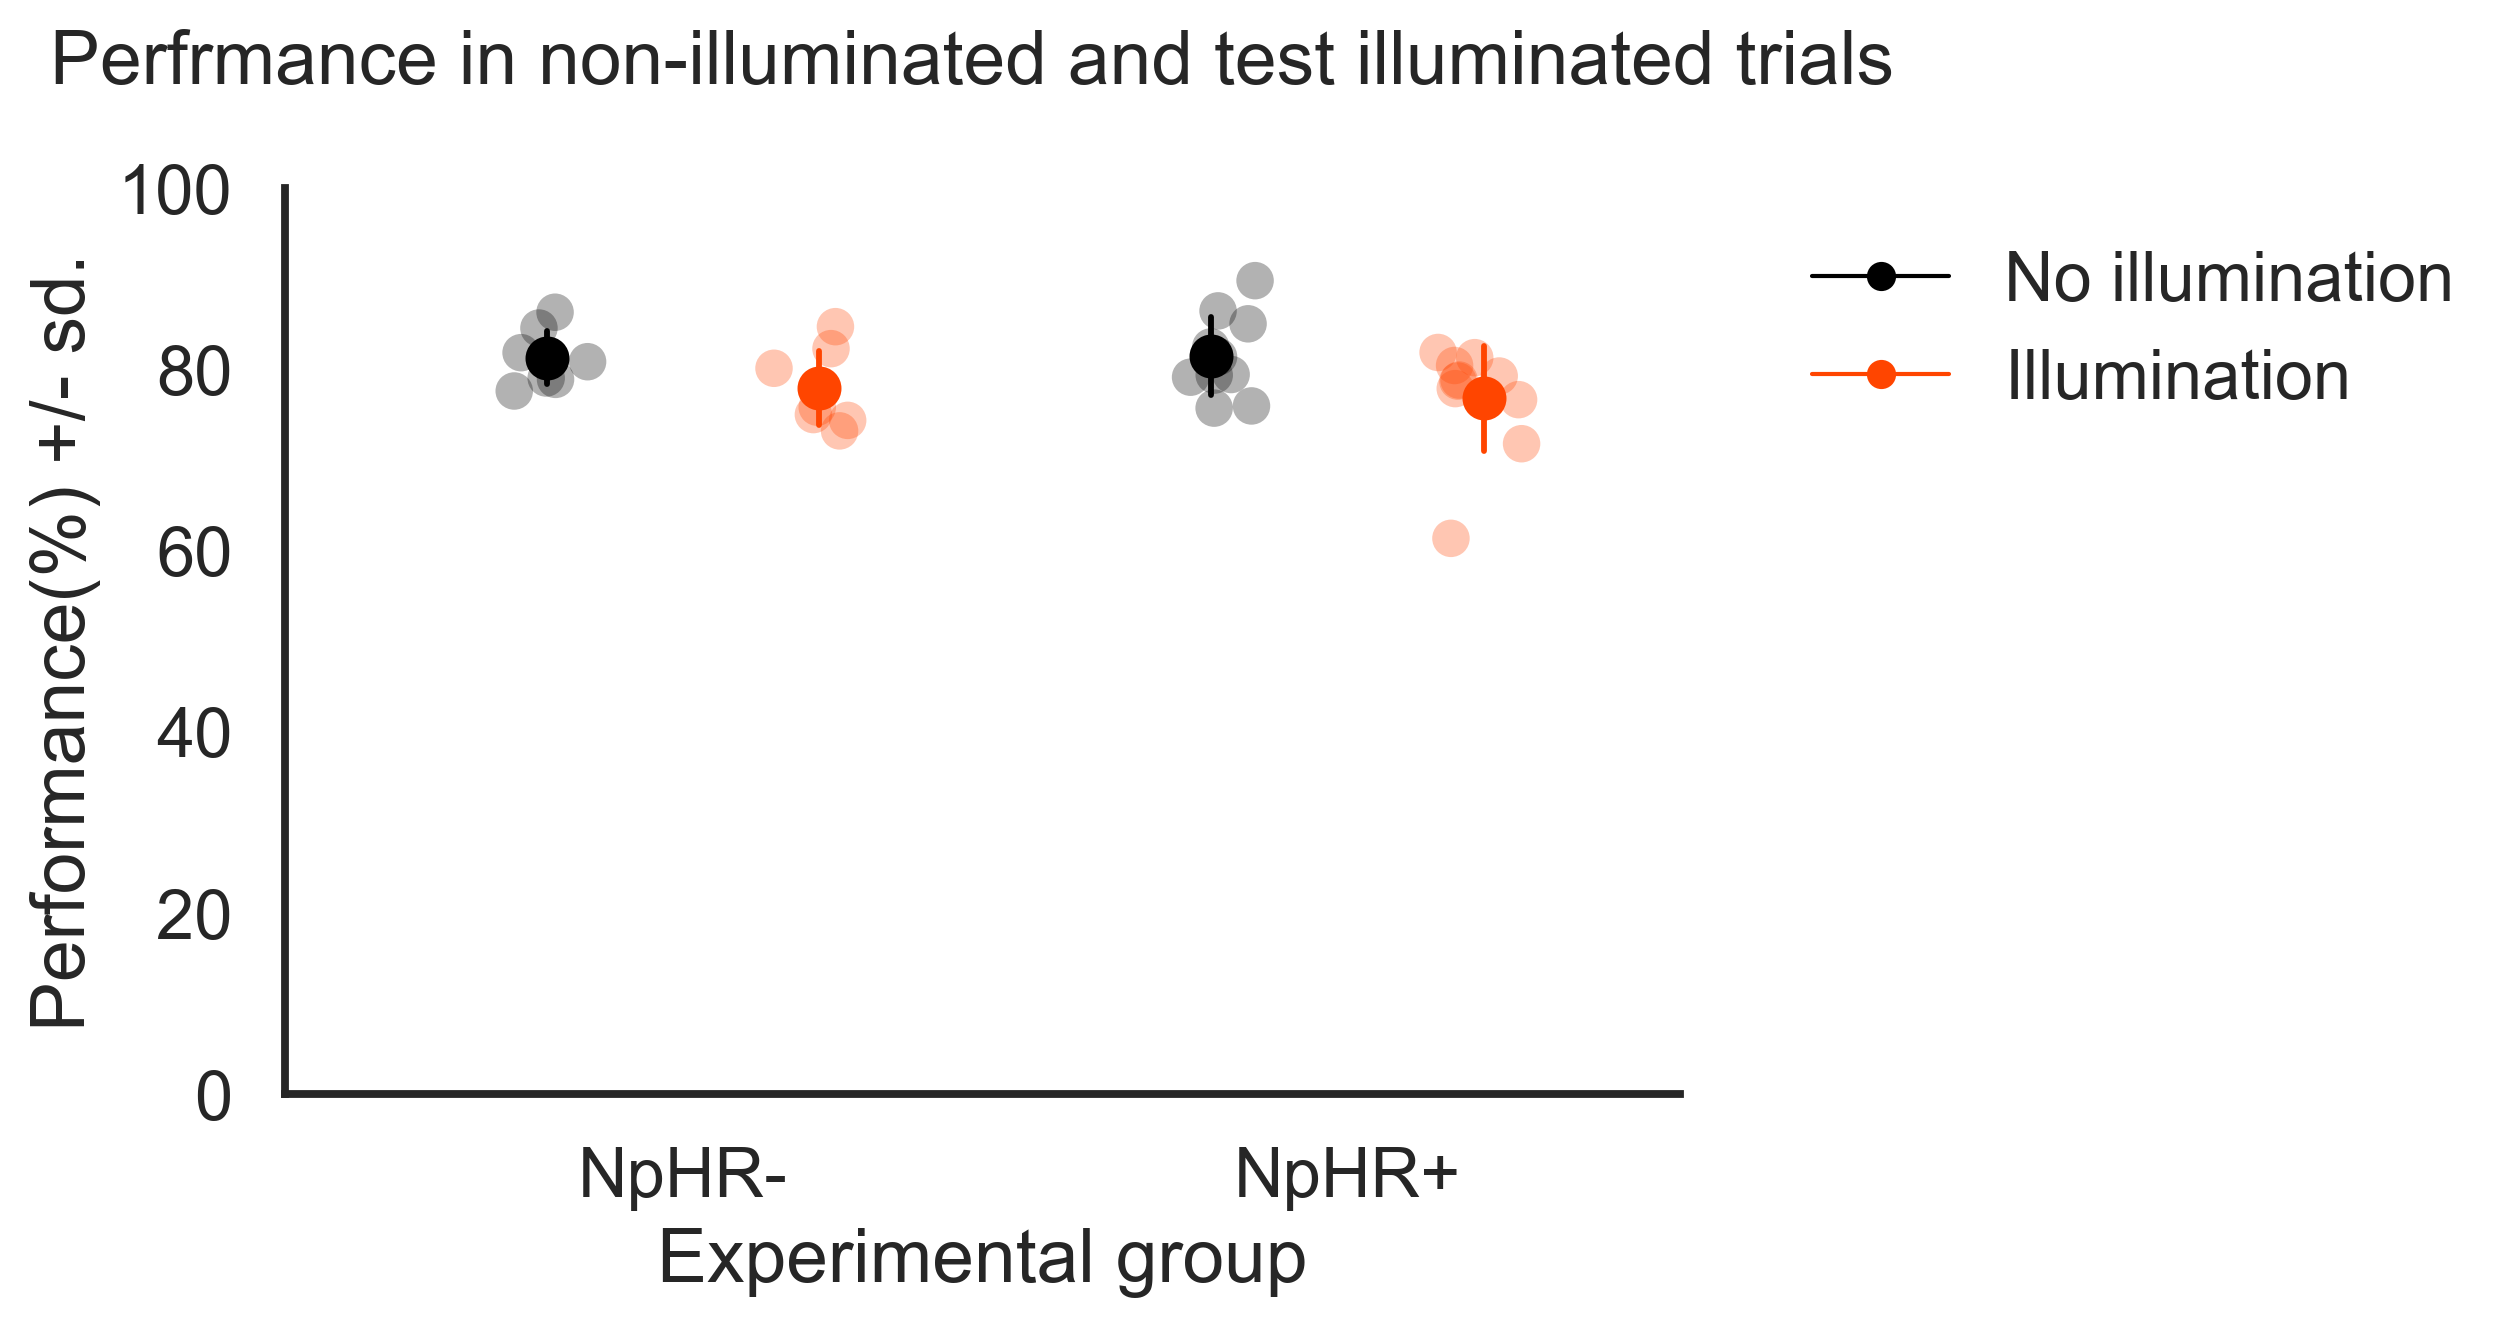

In [16]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(6,4), dpi=300)

pooled_perfs['stim_condition'] = pooled_perfs['stim_condition'].astype(str)

g = sns.stripplot(
    x='group', y='performance', hue='stim_condition',
    data=pooled_perfs,
    dodge=2, jitter=.13,
    alpha=.3, s=9,
    palette=['black', 'orangered'],
    order=['CTRL', 'NPHR']
)

# Show means
sns.pointplot(
    x='group', y='performance', hue='stim_condition',
    data=pooled_perfs,
    dodge=.41, 
    join=False,            
    markers="o", scale=.8, 
    estimator=np.mean,
    ci="sd", errwidth=1.4,
    palette=['black', 'orangered'],
    order=['CTRL', 'NPHR']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Experimental group',
    ylim=(0, 100), xlim=(-0.6, 1.5),
    title='Perfrmance in non-illuminated and test illuminated trials \n'
)

g.set_xticklabels(labels=['NpHR-', 'NpHR+'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()

control_line = mlines.Line2D([], [], color='black', marker='o', markersize=6, linewidth=1, label='No illumination')
nphr_line = mlines.Line2D([], [], color='orangered', marker='o', markersize=6, linewidth=1, label='Illumination')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.6, 1))
sns.despine()

### Visually, the data above shows that the subjects from both experimental groups tend to perform at a similar level, regardless of the illumination condition. This was expect for the NpHR. group but not for the NpHR+ group, suggesting that silencing of cingulate cortex during the test run does not lead to performance deficits in the overall performance of subjects.

### I will conduct a significance test to confirm my visual reading of the data. 

In [1]:
sns.displot(
    pooled_perfs, x="performance", col="stim_condition", row="group",
    binwidth=2, height=3, facet_kws=dict(margin_titles=True),
)

from scipy.stats import shapiro

normality_testing = {}
for group, data in pooled_perfs.groupby(['group', 'stim_condition'])['performance']:
    stat, p = shapiro(data)
    normality_testing[group] = (stat, p)

normality_testing = pd.Series(normality_testing)
normality_testing

NameError: name 'sns' is not defined

##### The shapiro-Wilk test has confirmed that all but one distribution (NpHR+ , illumination condition) could have been withdrawn from a normal distribution (checked visually above too). Because for one of the distributions the null hypothesis was rejected, I performed two transformations in the four data distributions from pooled performance - square-root and log(e)/(10). I found that these transformations did not transform the NPHR+/illumination distribution into a distribution of data points that could have been withdrawn from a normal distribution, shown by the shapiro-Wilk test.
***

##### I will resort to a non-parametric test, namely the Wilcoxon signed rank test, to compare the performance of subjects within each group, across the two experimental conditions. (two-tailed)

In [19]:
# NpHR - group
from scipy.stats import wilcoxon
ctrl_no_illum = pooled_perfs[(pooled_perfs['group']=='CTRL') & (pooled_perfs['stim_condition']=='0')]
ctrl_illum = pooled_perfs[(pooled_perfs['group']=='CTRL') & (pooled_perfs['stim_condition']=='3')]
diff = ctrl_no_illum['performance']-ctrl_illum['performance']
w, p = wilcoxon(x=ctrl_no_illum['performance'], y=ctrl_illum['performance'])
print(w, p)

# NpHR+ group
nphr_no_illum = pooled_perfs[(pooled_perfs['group']=='NPHR') & (pooled_perfs['stim_condition']=='0')]
nphr_illum = pooled_perfs[(pooled_perfs['group']=='NPHR') & (pooled_perfs['stim_condition']=='3')]
diff = nphr_no_illum['performance'] - nphr_illum['performance']

w, p = wilcoxon(x=nphr_no_illum['performance'], y=nphr_illum['performance'])
print(w, p)

1.0 0.03125


In [20]:
# NpHR+ group
nphr_no_illum = pooled_perfs[(pooled_perfs['group']=='NPHR') & (pooled_perfs['stim_condition']=='0')]
nphr_illum = pooled_perfs[(pooled_perfs['group']=='NPHR') & (pooled_perfs['stim_condition']=='3')]
diff = nphr_no_illum['performance'] - nphr_illum['performance']

w, p = wilcoxon(x=nphr_no_illum['performance'], y=nphr_illum['performance'])
print(w, p)

2.0 0.005859375


## <font color='darkgreen'> How does performance vary within each group, that is across individuals? And how much does it vary?

Text(0.5, 1.0, 'NpHR+')

<Figure size 2700x1200 with 0 Axes>

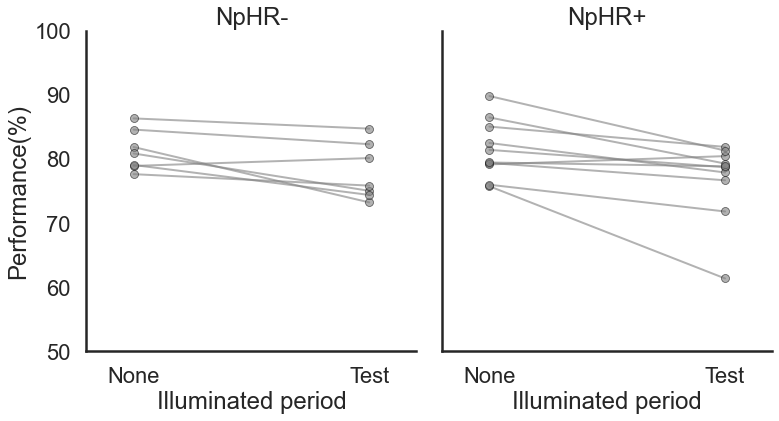

In [21]:
sns.set(style="white", context='poster')    
plt.figure(figsize=(9,4),dpi=300)
colors = ['gray']*17 # Needs adjusting as more rats are added
g = sns.relplot(
    data=pooled_perfs, col='group', height=6,
    x='stim_condition', y='performance', hue='rat', kind='line',
    linewidth=2, marker='o', markersize=8, alpha=.6, markeredgecolor='black',
    palette=colors, legend=False,
    aspect=.9
)

g.set(
    ylabel='Performance(%)', xlabel='Illuminated period',
    ylim=(50, 100), xlim=(-0.2, 1.2), xticks=[0,1],
    xticklabels=['None', 'Test']
)

axes = g.axes.flatten()
axes[0].set_title("NpHR-")
axes[1].set_title("NpHR+")

In [22]:
no_illumin = pooled_perfs[pooled_perfs['stim_condition']=='0'].reset_index(drop=True)
test_illumin = pooled_perfs[pooled_perfs['stim_condition']=='3'].reset_index(drop=True)
diff = test_illumin['performance']-no_illumin['performance']
pooled_perf_diffs = pd.concat([no_illumin[['group', 'rat']], diff], axis=1)

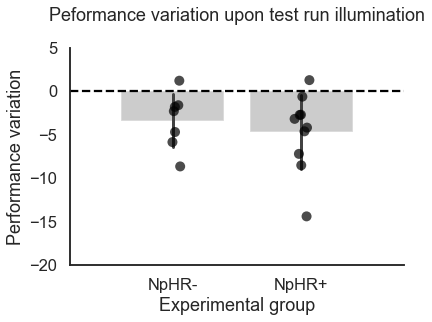

In [23]:
plt.Figure(figsize=(5,7))
sns.set(style='white', context='talk')

# Add bars
g = sns.barplot(data=pooled_perf_diffs, x='group', y='performance',
           ci='sd', errwidth=3,
            palette=['gray', 'gray'], alpha=.4)
# Add individual dots
g = sns.stripplot(
    x='group', y='performance',
    data=pooled_perf_diffs,
    dodge=2, jitter=.07,
    alpha=.7, s=10,
    palette=['black', 'black'],
    order=['CTRL', 'NPHR']
)
# Add horizontal line (= zero deviation)
plt.axhline(0, 0, 2, linestyle='dashed', color='black')

# Add specs
g.set(ylabel='Performance variation', xlabel='Experimental group',
     title='Peformance variation upon test run illumination\n',
     xticks=[0,1], xticklabels=['NpHR-', 'NpHR+'], xlim=[-.8,1.8], ylim=[-20, 5])

sns.despine()

#### As seen in both plots above, the variation of performance under different illumination conditions within each group is comparable, with similar average variation and with standard deviations overlaping. 

# <font color='darkgreen'> 2. Session performances distribution during the illumination protocol
***
   #### Calculation of the performances for each session*rat given the stimulation condition and grouped by experimental group
   #### Compares the performance levels of each experimental group in each stimulation condition, across the protocol, at the session level
***

In [24]:
session_perfs

,group,rat,session,stim_condition,performance
0,CTRL,CTRL2,2020-02-07T14_40_27,0,50.000000
1,CTRL,CTRL2,2020-02-07T14_40_27,3,71.428571
2,CTRL,CTRL2,2020-02-08T10_24_17,0,71.428571
3,CTRL,CTRL2,2020-02-08T10_24_17,3,100.000000
4,CTRL,CTRL2,2020-02-09T10_17_11,0,100.000000
...,...,...,...,...,...
483,NPHR,NPHR9,2020-12-07T12_44_10,3,40.000000
484,NPHR,NPHR9,2020-12-08T14_51_38,0,60.000000
485,NPHR,NPHR9,2020-12-08T14_51_38,3,40.000000
486,NPHR,NPHR9,2020-12-09T10_21_43,0,66.666667


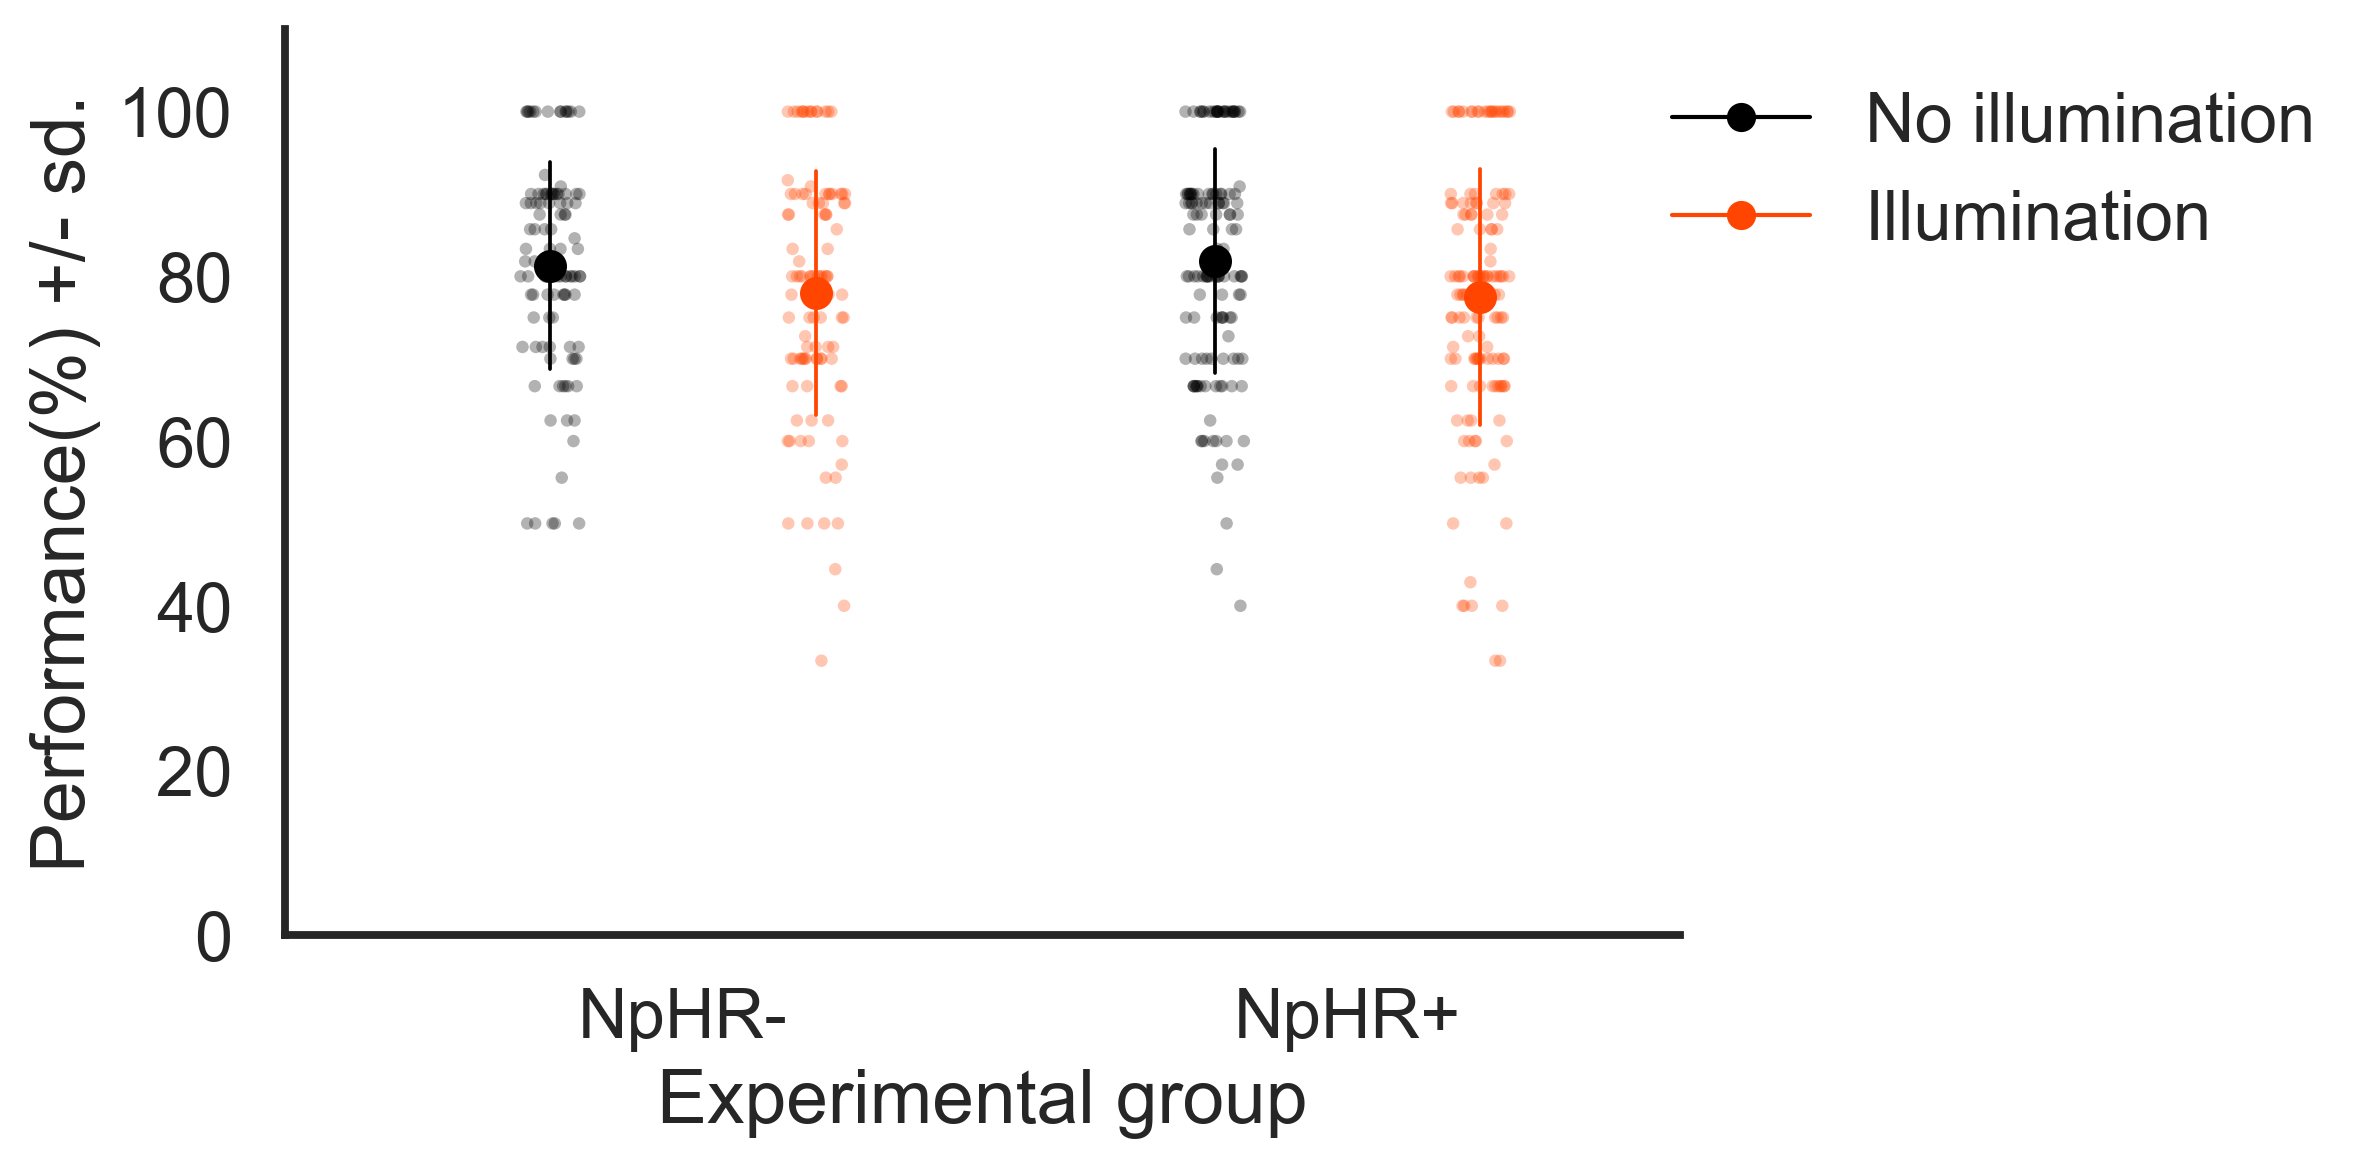

In [25]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(6,4),dpi=300)


g = sns.stripplot(
    data=session_perfs,
    x='group', y='performance', hue='stim_condition',
    dodge=2, jitter=.09,
    alpha=.3, s=3,
    palette=['black', 'orangered']
)

# Show means
sns.pointplot(
       x='group', y='performance', hue='stim_condition',
        data=session_perfs,
        dodge=.4, 
        join=False,       
        markers="o", scale=.6, linewidth=1.5,
        ci="sd", errwidth=.9,
        palette=['black', 'orangered']
)
g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Experimental group',
    ylim=(0, 110), xlim=(-0.6, 1.5), xticklabels=['NpHR-', 'NpHR+'])
# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()
noillum_line = mlines.Line2D([], [], color='black', marker='o', markersize=6, linewidth=1, label='No illumination')
illum_line = mlines.Line2D([], [], color='orangered', marker='o', markersize=6, linewidth=1, label='Illumination')
plt.legend(handles=[noillum_line, illum_line], frameon=False, loc='upper right', bbox_to_anchor=(1.5, 1))

sns.despine()

#### Some sessions (below) have a performance of zero. I checked these sessions and they are all small portions of larger sessions (for instance due to Bonsai crahes). Due to the low number of trials, it is easy for them to have performances of zero. 

# <font color='darkgreen'> 3. How does performance vary with experience?
***
#### Grouping trials by groups of 50 and calculating the performance under no illumination or test illumination in each group
***

In [26]:
# Calculate performance per condition at any given N trials
grouped = below15_test_runs.groupby(['group','rat', 'stim_condition'])
group_list = []

N = 30

for group in grouped.groups:
    
    par_perf_group = calculate_performance_given_ntrials(grouped, group, N)
    
    try:
        group_list.append(par_perf_group)
    except:
        group_list = par_perf_group
        
par_perf = pd.concat(group_list)
par_perf = par_perf.rename(columns={'outcome': 'performance'}).reset_index()

In [27]:
par_perf

,index,performance,group,rat,stim
0,0,76.666667,CTRL,CTRL2,0
1,1,76.666667,CTRL,CTRL2,0
2,2,90.000000,CTRL,CTRL2,0
3,3,72.413793,CTRL,CTRL2,0
4,0,80.000000,CTRL,CTRL2,3
...,...,...,...,...,...
148,0,76.666667,NPHR,NPHR9,3
149,1,76.666667,NPHR,NPHR9,3
150,2,66.666667,NPHR,NPHR9,3
151,3,70.000000,NPHR,NPHR9,3


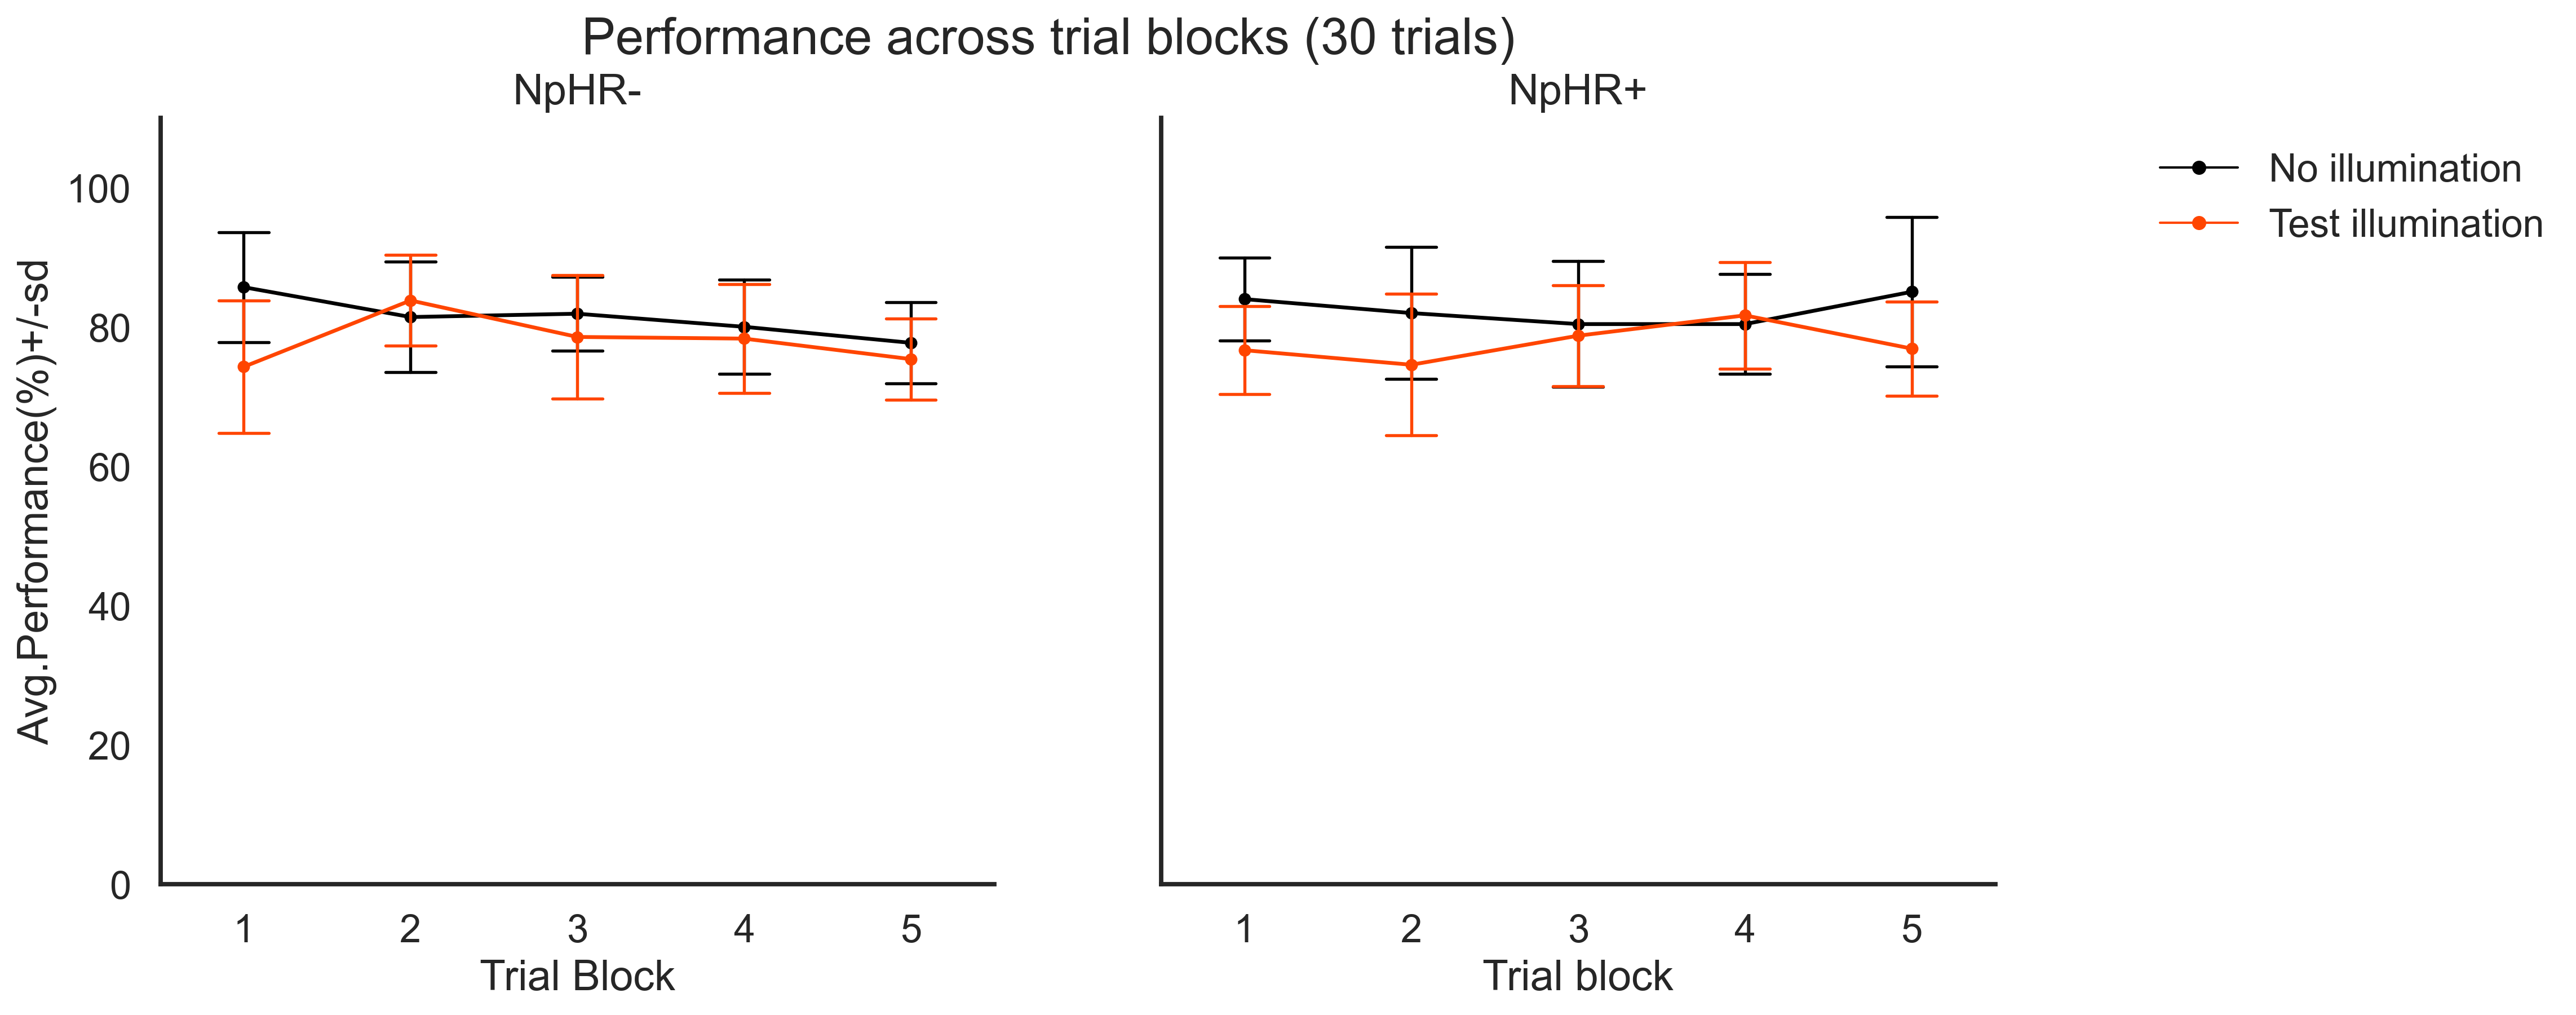

In [28]:
fig, axes = plt.subplots(1,2, figsize=(14,6), sharey=True,dpi=300)
fig.suptitle("Performance across trial blocks (30 trials)\n\n")
sns.set(style="white", context='talk')

# Show means. 1st color=0, 3rd color=test
g = sns.pointplot(
    ax=axes[0],
    data=par_perf[par_perf['group']=='CTRL'], 
    kind='line', 
    x='index', y='performance', hue='stim', 
    ci='sd', linewidth=.06, capsize=.3, errwidth=1.3,
    scale=.4,
    palette=['black', 'orangered'],
)

a = sns.pointplot(
    ax=axes[1],
    data=par_perf[par_perf['group']=='NPHR'], 
    kind='line', 
    x='index', y='performance', hue='stim', 
    ci='sd', linewidth=.06, capsize=.3, errwidth=1.3,
    scale=.4,
    palette=['black', 'orangered'],
)


g.set(
    xlim=(-.5,4.5), ylim=(0,110),
    ylabel='Avg.Performance(%)+/-sd', xlabel='Trial Block',
    title="NpHR-"
)
a.set(
    xlim=(-.5, 4.5), ylim=(0,110),
    ylabel='', xlabel='Trial block',
    title="NpHR+"
)

g.set_xticklabels(range(1,6))
a.set_xticklabels(range(1,6))
g.legend_.remove()
noillum_line = mlines.Line2D([], [], color='black', marker='o', markersize=5, linewidth=1, label='No illumination')
testillum_line = mlines.Line2D([], [], color='orangered', marker='o', markersize=5, linewidth=1, label='Test illumination')
plt.legend(handles=[noillum_line, testillum_line], frameon=False, loc='upper right', bbox_to_anchor=(1.7, 1))
sns.despine()

#### The performance across trials in both groups remains stable over time, regardless of the illumination condition. 

In [29]:
session_perfs['session_nr']=""

def add_session_nr(group):
    group['session_nr']=range(1,len(group)+1)
    return group

session_perfs = session_perfs.groupby(['group', 'rat', 'stim_condition']).apply(add_session_nr)
session_perfs = session_perfs[session_perfs['session_nr']<=15] #Removes the two final sessions of NPHR6

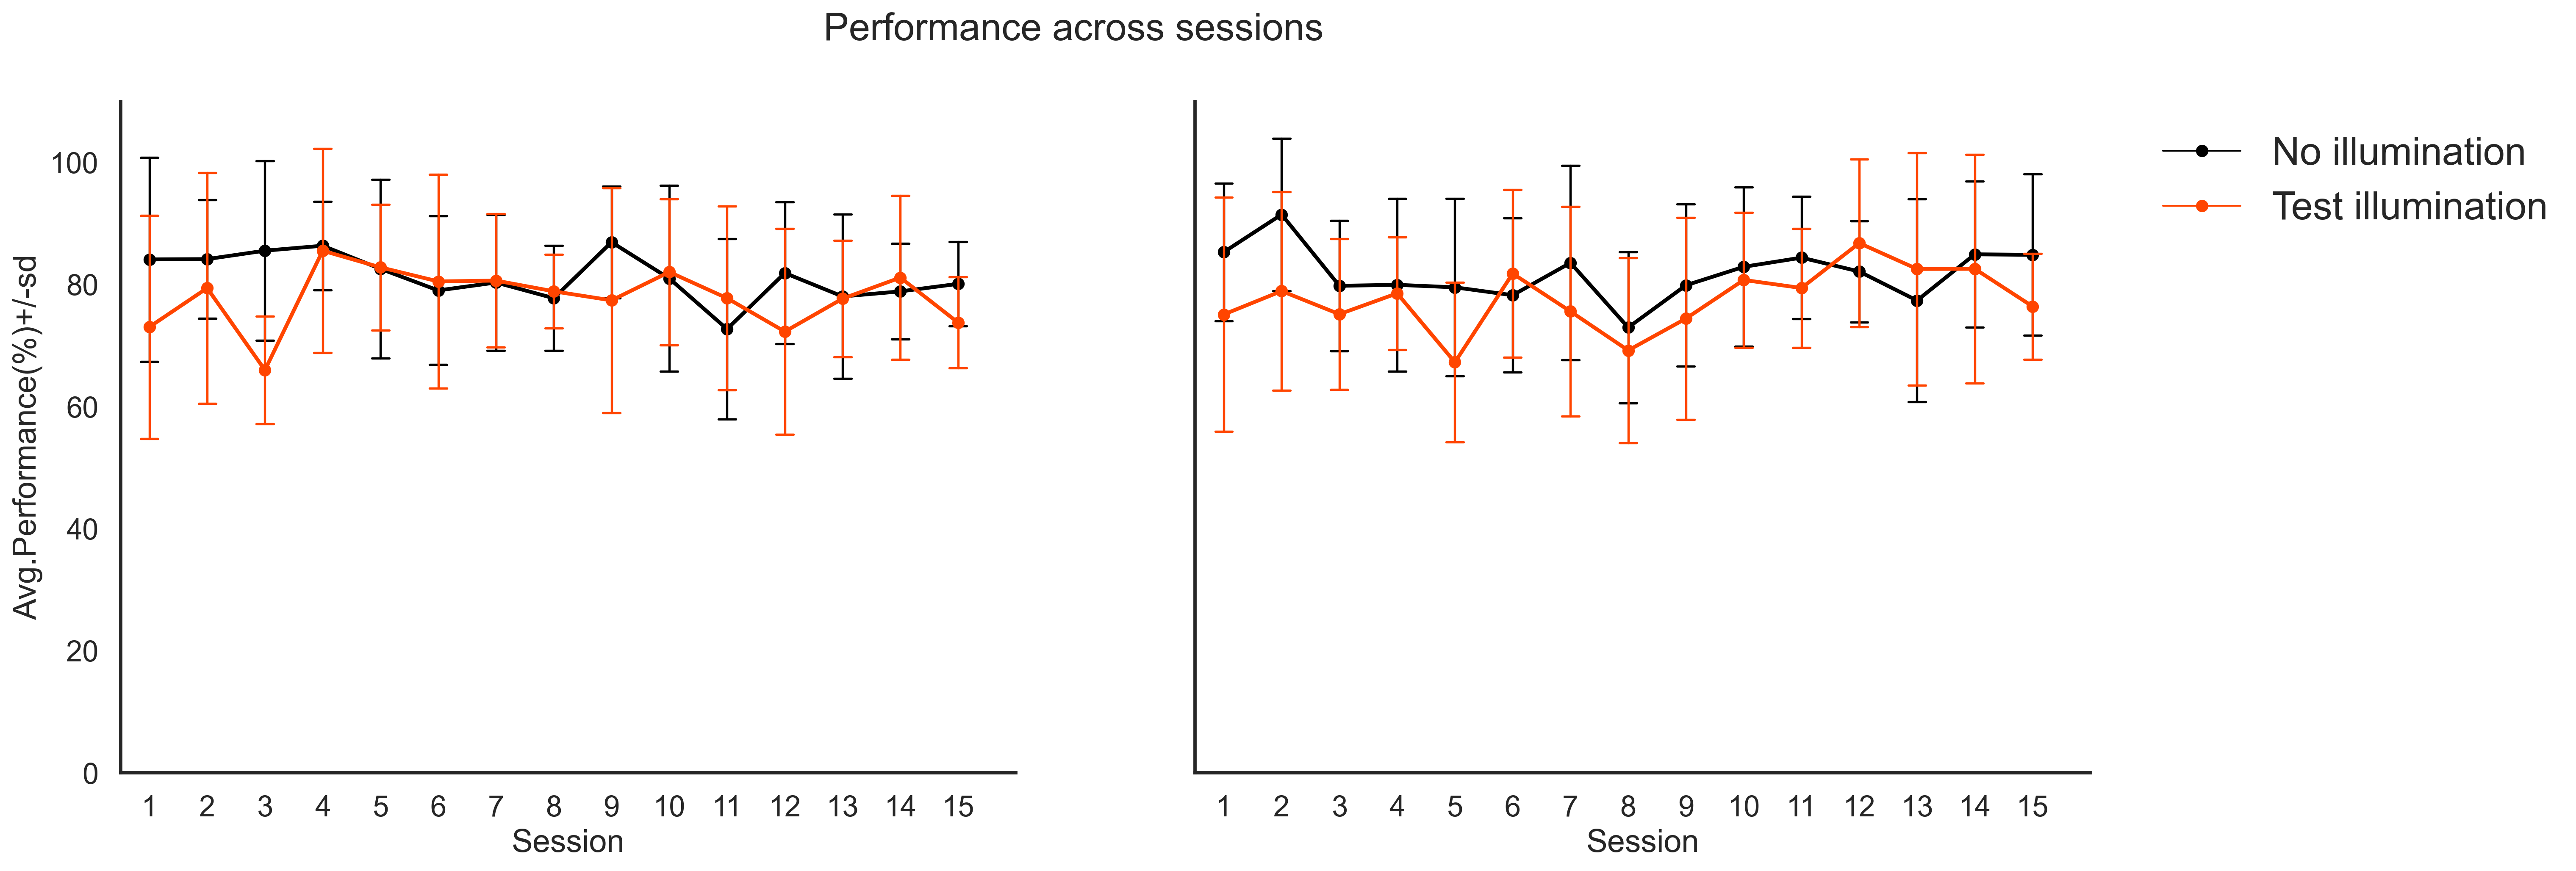

In [30]:
fig, axes = plt.subplots(1,2, figsize=(20,7), sharey=True,dpi=300)
fig.suptitle("Performance across sessions")
sns.set(style="white", context='poster')

# Show means. 1st color=0, 3rd color=test
g = sns.pointplot(
    ax=axes[0],
    data=session_perfs[session_perfs['group']=='CTRL'], 
    kind='line', 
    x='session_nr', y='performance', hue='stim_condition', 
    ci='sd', linewidth=.06, capsize=.3, errwidth=1.3,
    scale=.4,
    palette=['black', 'orangered'],
)

a = sns.pointplot(
    ax=axes[1],
    data=session_perfs[session_perfs['group']=='NPHR'], 
    kind='line', 
    x='session_nr', y='performance', hue='stim_condition', 
    ci='sd', linewidth=.06, capsize=.3, errwidth=1.3,
    scale=.4,
    palette=['black', 'orangered'],
)


g.set(
    xlim=(-.5,15), ylim=(0,110),
    ylabel='Avg.Performance(%)+/-sd', xlabel='Session',
)
a.set(
    xlim=(-.5,15), ylim=(0,110),
    ylabel='', xlabel='Session')

#g.set_xticklabels(range(1, 15))
g.legend_.remove()
noillum_line = mlines.Line2D([], [], color='black', marker='o', markersize=6, linewidth=1, label='No illumination')
testillum_line = mlines.Line2D([], [], color='orangered', marker='o', markersize=6, linewidth=1, label='Test illumination')
plt.legend(handles=[noillum_line, testillum_line], frameon=False, loc='upper right', bbox_to_anchor=(1.55, 1))
sns.despine()

#### Similarly, when we plot the data to specifically compare the performance of the experimental groups under the two conditions, we find no difference between their average performance as rats become more experienced in the task.

In [109]:
model = sm.MixedLM.from_formula("performance ~ session_nr", nphr, 
                                groups=nphr['stim_condition'], re_formula='~session_nr')
result = model.fit()
result.summary()

C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   performance
No. Observations:     274       Method:               REML       
No. Groups:           2         Scale:                214.7408   
Min. group size:      137       Log-Likelihood:       -1124.6848 
Max. group size:      137       Converged:            No         
Mean group size:      137.0                                      
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              78.299    2.605 30.057 0.000 73.193 83.405
session_nr              0.165    0.375  0.441 0.659 -0.570  0.901
Group Var               7.043    0.618                           
Group x session_nr Cov -0.567    0.091                           
session_nr Var          0.196                                    
=================================================================

"""

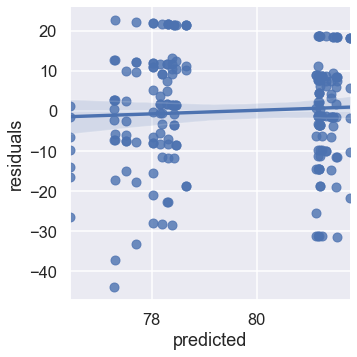

In [119]:
check_residuals = pd.DataFrame()
check_residuals["residuals"] = result.resid.values
check_residuals["session_nr"] = nphr.session_nr
check_residuals["predicted"] = result.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = check_residuals)

In [112]:
model = sm.MixedLM.from_formula("performance ~ session_nr", ctrl, 
                                groups=ctrl['stim_condition'], re_formula='session_nr')
result = model.fit()
result.summary()

C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   performance
No. Observations:     210       Method:               REML       
No. Groups:           2         Scale:                189.8706   
Min. group size:      105       Log-Likelihood:       -851.4459  
Max. group size:      105       Converged:            Yes        
Mean group size:      105.0                                      
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              81.464    2.555 31.887 0.000 76.457 86.472
session_nr             -0.230    3.953 -0.058 0.954 -7.977  7.518
Group Var               5.046    0.759                           
Group x session_nr Cov  0.554    1.408                           
session_nr Var         31.155                                    
=================================================================

"""